# Geodedetic image overlay

In [1]:
import numpy as np


def sample_data(shape=(73, 145)):
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data


lon, lat, data = sample_data(shape=(73, 145))
lon -= 180

In [2]:
%matplotlib inline

import matplotlib

cm = matplotlib.colormaps["cubehelix"]

normed_data = (data - data.min()) / (data.max() - data.min())
colored_data = cm(normed_data)

## Bad


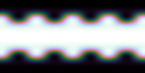

In [3]:
import folium


m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    opacity=0.25,
).add_to(m)

m

## Good


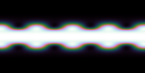

In [4]:
m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    mercator_project=True,
    opacity=0.25,
).add_to(m)


m

## Same as above but with cartopy


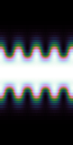

In [5]:
import cartopy.crs as ccrs
from cartopy.img_transform import warp_array

source_extent = [lon.min(), lon.max(), lat.min(), lat.max()]

new_data = warp_array(
    colored_data,
    target_proj=ccrs.GOOGLE_MERCATOR,
    source_proj=ccrs.PlateCarree(),
    target_res=data.shape,
    source_extent=source_extent,
    target_extent=None,
    mask_extrapolated=False,
)


m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=new_data[0],
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    opacity=0.25,
).add_to(m)

m

TODO: Try [rasterio](https://github.com/mapbox/rasterio/blob/ca75cf0a842943c1b3da4522e6ea3500215130fd/docs/reproject.rst).  Rasterio can warp images and arrays.


## Compare to original

From https://scitools.org.uk/cartopy/docs/latest/gallery/scalar_data/waves.html

![](https://scitools.org.uk/cartopy/docs/latest/_images/sphx_glr_waves_001.png)